In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pandas as pd
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
import os

c:\Users\jereb\anaconda3\envs\tensor\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\jereb\anaconda3\envs\tensor\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\jereb\anaconda3\envs\tensor\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#here grab dataset from folder
batch_size = 50
img_height = 224
img_width = 224
ushapes = r"C:/Users/jereb/Downloads/harp_dataset/HARP_DATASET/dataset_supervised/square_images_size224_cleaned/UShape/"
no_ushapes = r"C:/Users/jereb/Downloads/harp_dataset/HARP_DATASET/dataset_supervised/square_images_size224_cleaned/NoUShape/"

In [3]:
def extract_spectrograms(path):
  os.chdir(path)
  spectrograms = []

  with os.scandir(path) as files:
    for file in files:
      if file.name.endswith('.png'):
        spectrograms.append(file.path)
  return spectrograms

ushapes_spectrograms = extract_spectrograms(ushapes)
no_ushape_spectrograms = extract_spectrograms(no_ushapes)
total_spectograms = ushapes_spectrograms + no_ushape_spectrograms
print(f"total specto: {len(total_spectograms)}, ushape: {len(ushapes_spectrograms)}, noushape: {len(no_ushape_spectrograms)}")
training_size = int(len(total_spectograms) * 0.01)
testing_size = int(len(total_spectograms) * 0.25)
unlabeled_size = int(len(total_spectograms) * .74)
print(f"training size: {training_size}, testing size: {testing_size}, unlabeled size: {unlabeled_size}")

import random
random.shuffle(total_spectograms)




total specto: 3990, ushape: 168, noushape: 3822
training size: 39, testing size: 997, unlabeled size: 2952


In [4]:
semi_supervised_path = r"C:/Users/jereb/Downloads/harp_dataset/HARP_DATASET/dataset_semisupervised/"
train_ushape_path = r"C:/Users/jereb/Downloads/harp_dataset/HARP_DATASET/dataset_semisupervised/train/ushape/"
train_noushape_path = r"C:/Users/jereb/Downloads/harp_dataset/HARP_DATASET/dataset_semisupervised/train/noushape/"
test_ushape_path = r"C:/Users/jereb/Downloads/harp_dataset/HARP_DATASET/dataset_semisupervised/test/ushape/"
test_noushape_path = r"C:/Users/jereb/Downloads/harp_dataset/HARP_DATASET/dataset_semisupervised/test/noushape/"
unlabeled_path = r"C:/Users/jereb/Downloads/harp_dataset/HARP_DATASET/dataset_semisupervised/unlabeled/"
#clear folders just in case
if len(os.listdir(train_ushape_path))!=0:
    for f in os.listdir(train_ushape_path):
        os.remove(train_ushape_path+f)
if len(os.listdir(train_noushape_path))!=0:
    for f in os.listdir(train_noushape_path):
        os.remove(train_noushape_path + f)
if len(os.listdir(test_ushape_path))!=0:
    for f in os.listdir(test_ushape_path):
        os.remove(test_ushape_path+f)
if len(os.listdir(test_noushape_path))!=0:
    for f in os.listdir(test_noushape_path):
        os.remove(test_noushape_path+f)



In [5]:
fold_0 = unlabeled_path + r"fold_0/"
fold_1 = unlabeled_path + r"fold_1/"
fold_2 = unlabeled_path + r"fold_2/"
fold_3 = unlabeled_path + r"fold_3/"
#clear fold folders just in case
if len(os.listdir(fold_0))!=0:
    for f in os.listdir(fold_0):
        os.remove(fold_0+f)
if len(os.listdir(fold_1))!=0:
    for f in os.listdir(fold_1):
        os.remove(fold_1 + f)
if len(os.listdir(fold_2))!=0:
    for f in os.listdir(fold_2):
        os.remove(fold_2+f)
if len(os.listdir(fold_3))!=0:
    for f in os.listdir(fold_3):
        os.remove(fold_3+f)

## adjust below for changing size of amount of data in each the training, testing, and unlabeled

In [6]:
third_ushape = 168/3
third_noushape = 3822/3 * 0.25
#splitting ushape

for i, ushape in enumerate(os.listdir(ushapes)):
    if(ushape.endswith('png')):
        if i<third_ushape:
            shutil.copy(ushapes + ushape, train_ushape_path + ushape)
        elif i>third_ushape and i<third_ushape*2:
            shutil.copy(ushapes + ushape, test_ushape_path + ushape)
        elif i>third_ushape*2:
            shutil.copy(ushapes + ushape, unlabeled_path + ushape)
#spltting noushape
for i, noushape in enumerate(os.listdir(no_ushapes)):
    if(noushape.endswith('png')):
        if i<third_noushape:
            shutil.copy(no_ushapes + noushape, train_noushape_path + noushape)
        elif i>third_noushape and i<third_noushape*2:
            shutil.copy(no_ushapes + noushape, test_noushape_path + noushape)
        elif i>third_noushape*2:
            shutil.copy(no_ushapes + noushape, unlabeled_path + noushape)

In [7]:
print(f"size of training = {len(os.listdir(train_ushape_path))+len(os.listdir(train_noushape_path))}")
print(f"size of testing = {len(os.listdir(test_ushape_path))+len(os.listdir(test_noushape_path))}")
print(f"size of unlabeled = {len(os.listdir(unlabeled_path))-4}")
print(f"total spectograms = {len(os.listdir(train_ushape_path))+len(os.listdir(train_noushape_path)) + len(os.listdir(test_ushape_path))+len(os.listdir(test_noushape_path)) +len(os.listdir(unlabeled_path))-4}")

size of training = 366
size of testing = 373
size of unlabeled = 3248
total spectograms = 3987


In [8]:
# for i in range(4):
#     os.makedirs(f'{unlabeled_path}fold_{i}')

In [9]:
#split unlabeled between folds
fold_length = len(os.listdir(unlabeled_path))-4
for i, unlabeled in enumerate(os.listdir(unlabeled_path)):
    if(unlabeled.endswith('png')):
        if i<fold_length:
            shutil.move(unlabeled_path + unlabeled, fold_0 + unlabeled)
        elif i>fold_length and i<fold_length*2:
            shutil.move(unlabeled_path + unlabeled, fold_1 + unlabeled)
        elif i>fold_length*2 and i<fold_length*3:
            shutil.move(unlabeled_path + unlabeled, fold_2 + unlabeled)
        elif(i>fold_length*3):
            shutil.move(unlabeled_path + unlabeled, fold_3 + unlabeled)

## metric to adjust is batch size

In [10]:
# Create the ImageDataGenerator object
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

val_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)


#TODO edit parameters after changing lists to be dataframes
# Generate batches and augment the images
train_generator = train_datagen.flow_from_directory(
     r"C:/Users/jereb/Downloads/harp_dataset/HARP_DATASET/dataset_semisupervised/train",
    # directory='harp/training/',
    class_mode='binary',
    target_size=(224, 224)
)

val_generator = val_datagen.flow_from_directory(
    r"C:/Users/jereb/Downloads/harp_dataset/HARP_DATASET/dataset_semisupervised/test",
    # directory='harp/validation/',
    class_mode='binary',
    target_size=(224, 224)
)

Found 366 images belonging to 2 classes.
Found 373 images belonging to 2 classes.


In [11]:
def create_model(METRICS):
  model = Sequential([
    #data_augmentation,
    layers.Input(shape=(224, 224, 3)),
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=METRICS)
  return model

In [12]:
METRICS = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

## another metric to adjust is epoch

In [13]:
epochs = 25
model = create_model(METRICS)
history = model.fit_generator(generator=
  train_generator,
  validation_data=val_generator,
  epochs=epochs
)

C:\Users\jereb\AppData\Local\Temp\ipykernel_17948\2063298458.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=
c:\Users\jereb\anaconda3\envs\tensor\lib\site-packages\keras\preprocessing\image.py:1863: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
c:\Users\jereb\anaconda3\envs\tensor\lib\site-packages\keras\preprocessing\image.py:1873: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/25
12/12 [==============================] - 33s 2s/step - loss: 0.7333 - accuracy: 0.7896 - precision: 0.0435 - recall: 0.0179 - auc: 0.4997 - prc: 0.1478 - val_loss: 0.4423 - val_accuracy: 0.8525 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4263 - val_prc: 0.1203
Epoch 2/25
12/12 [==============================] - 13s 1s/step - loss: 0.4276 - accuracy: 0.8470 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5865 - prc: 0.1829 - val_loss: 0.4348 - val_accuracy: 0.8525 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4575 - val_prc: 0.1311
Epoch 3/25
12/12 [==============================] - 9s 789ms/step - loss: 0.4160 - accuracy: 0.8470 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6118 - prc: 0.1797 - val_loss: 0.4265 - val_accuracy: 0.8525 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5210 - val_prc: 0.1456
Epoch 4/25
12/12 [==============================] - 10s 815ms/step - loss: 0.4026 - accuracy: 0.8470

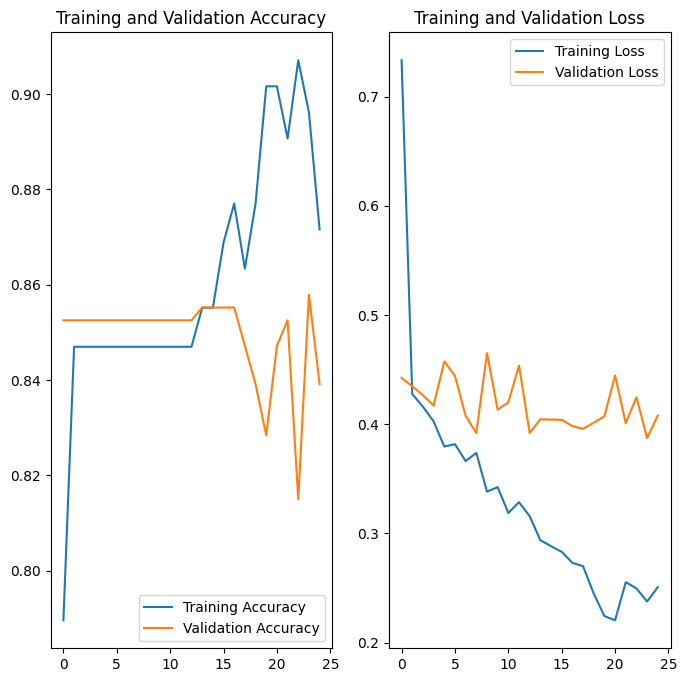

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()